In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from imblearn.over_sampling import ADASYN
def seed_everything(seed=2020):
    random.seed(seed)
    np.random.seed(seed)
seed_everything(42)

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("../../data/plasmaetch.csv")


In [3]:
data.shape

(22605, 21)

In [4]:
# data.head()
# data.tail()
print('Normal', round(data['label'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Fault', round(data['label'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Normal 87.42 % of the dataset
Fault 12.58 % of the dataset


In [5]:
del data['Unnamed: 0']
del data['bid']
# del data['bid']

In [6]:
data.shape

(22605, 19)

In [7]:
X = data.drop(['label'], axis=1)
y = data['label']

In [8]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = ADASYN(random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(X, y)

In [9]:
ysm_train.shape

(39370,)

# Data Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xsm_train, ysm_train, test_size = 0.3, random_state = 42)

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix,precision_recall_curve,auc,f1_score,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score


def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y):
    
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    print (algorithm)
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    print ("\nrecall score:\n",(recall_score(dtest_y,predictions)))
    print ("\nf1 score:\n",(f1_score(dtest_y,predictions)))
#     print ("\nclassification report :\n",(classification_report(dtest_y,predictions)))
    print ("\nmatthews_corrcoef:\n", (matthews_corrcoef(dtest_y, predictions)))
    #cross validation
    
    # Graph
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

MODEL - OUTPUT
*****************************************************************************************
LogisticRegression()

accuracy_score : 0.9345525357717382

recall score:
 0.9910215144841606

f1 score:
 0.9380261364547424

matthews_corrcoef:
 0.8747078715441856


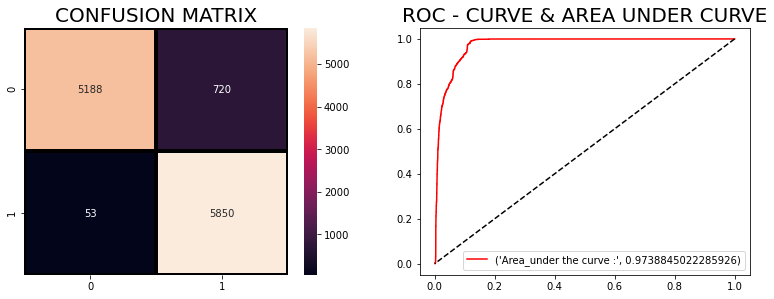

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model(clf ,X_train,y_train,X_test,y_test)

MODEL - OUTPUT
*****************************************************************************************
DecisionTreeClassifier()

accuracy_score : 0.9881466429599526

recall score:
 0.990682703709978

f1 score:
 0.9881716796214938

matthews_corrcoef:
 0.9763059302062483


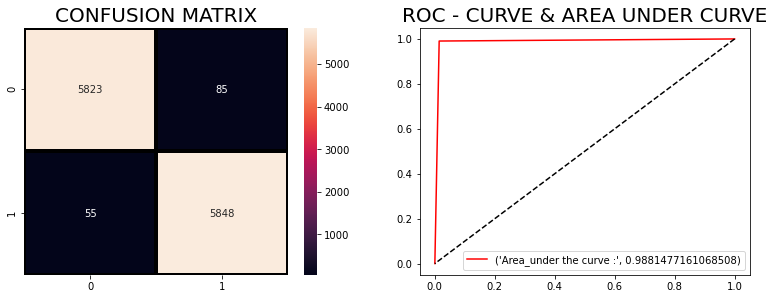

In [14]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
model(clf ,X_train,y_train,X_test,y_test)

MODEL - OUTPUT
*****************************************************************************************
SVC(probability=True)

accuracy_score : 0.93751587503175

recall score:
 0.997797729967813

f1 score:
 0.941044895350695

matthews_corrcoef:
 0.8814674321864249


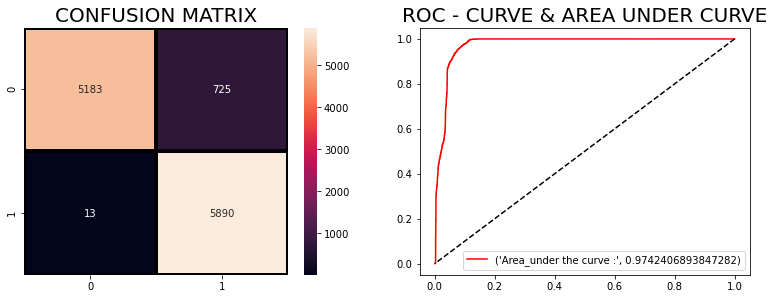

In [15]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC(probability=True) 

model(svc ,X_train,y_train,X_test,y_test)

MODEL - OUTPUT
*****************************************************************************************
RandomForestClassifier()

accuracy_score : 0.9928879857759716

recall score:
 0.9986447569032695

f1 score:
 0.9929257200606366

matthews_corrcoef:
 0.9858413952994315


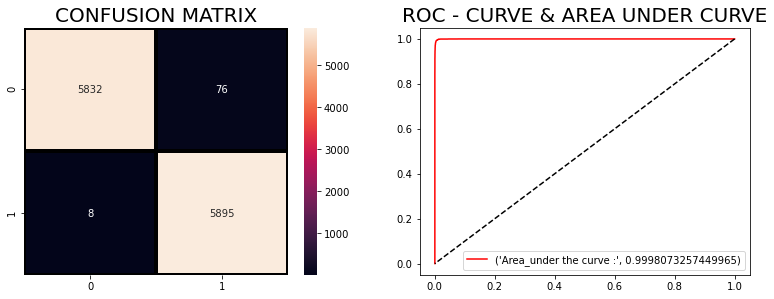

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model(clf ,X_train,y_train,X_test,y_test)